In [1]:
import pandas as pd
from hanziconv import HanziConv 
import unicodedata
import jieba
from stopwordsiso import stopwords
import emoji
from snownlp import SnowNLP
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

from tensorflow.keras.initializers import Constant
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, ReLU, Dropout, Input, CuDNNLSTM, LSTM
from keras.models import Model
from keras.optimizers import RMSprop


from keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
from gensim.models import Word2Vec
import gensim

In [3]:
df = pd.read_csv("../EDA_NLP_for_Chinese/augmented.csv", delimiter= ',')
X = df[["short_comment","score", "movie_name"]].copy()
Y = df[["Fake"]].copy()
X.head()

,short_comment,score,movie_name
0,没想到 ， 这是 唯一 一部 尊严 春节 档 的 电影 。,4,这个杀手不太冷静
1,没想到 ， 这是 电影 一部 尊重 春节 档 的 唯一 。,4,这个杀手不太冷静
2,没想到 ， 这是 唯一 一部 尊重 春节 档 的 电影 。,4,这个杀手不太冷静
3,没想到 ， 这是 唯一 一部 尊重 春节 档 的 电影 。,4,这个杀手不太冷静
4,能 能 给 负分 吗 卧槽 浪费 我 时间,1,独行月球


In [4]:
stopwords(["zh"])

{'、',
 '。',
 '〈',
 '〉',
 '《',
 '》',
 '一',
 '一个',
 '一些',
 '一何',
 '一切',
 '一则',
 '一方面',
 '一旦',
 '一来',
 '一样',
 '一种',
 '一般',
 '一转眼',
 '七',
 '万一',
 '三',
 '上',
 '上下',
 '下',
 '不',
 '不仅',
 '不但',
 '不光',
 '不单',
 '不只',
 '不外乎',
 '不如',
 '不妨',
 '不尽',
 '不尽然',
 '不得',
 '不怕',
 '不惟',
 '不成',
 '不拘',
 '不料',
 '不是',
 '不比',
 '不然',
 '不特',
 '不独',
 '不管',
 '不至于',
 '不若',
 '不论',
 '不过',
 '不问',
 '与',
 '与其',
 '与其说',
 '与否',
 '与此同时',
 '且',
 '且不说',
 '且说',
 '两者',
 '个',
 '个别',
 '中',
 '临',
 '为',
 '为了',
 '为什么',
 '为何',
 '为止',
 '为此',
 '为着',
 '乃',
 '乃至',
 '乃至于',
 '么',
 '之',
 '之一',
 '之所以',
 '之类',
 '乌乎',
 '乎',
 '乘',
 '九',
 '也',
 '也好',
 '也罢',
 '了',
 '二',
 '二来',
 '于',
 '于是',
 '于是乎',
 '云云',
 '云尔',
 '五',
 '些',
 '亦',
 '人',
 '人们',
 '人家',
 '什',
 '什么',
 '什么样',
 '今',
 '介于',
 '仍',
 '仍旧',
 '从',
 '从此',
 '从而',
 '他',
 '他人',
 '他们',
 '他们们',
 '以',
 '以上',
 '以为',
 '以便',
 '以免',
 '以及',
 '以故',
 '以期',
 '以来',
 '以至',
 '以至于',
 '以致',
 '们',
 '任',
 '任何',
 '任凭',
 '会',
 '似的',
 '但',
 '但凡',
 '但是',
 '何',
 '何以',
 '何况',
 '何处',
 '何时',
 '余外',
 '作为',
 '你',
 '你们',
 '使',


In [5]:
stopwords(["zh"])

stopwords_ZH = [HanziConv.toSimplified(i) for i in stopwords(["zh"])]
stopwords_ZH

['随时',
 '矣乎',
 '论',
 '否则',
 '这么点儿',
 '还',
 '冲',
 '７',
 '若非',
 '哪个',
 '咱',
 '有时',
 '前后',
 '不光',
 '莫不然',
 '这次',
 '打从',
 '进而',
 '九',
 '以免',
 '自个儿',
 '有及',
 '分',
 '可',
 '因而',
 '尔后',
 '可见',
 '或者',
 '说',
 '９',
 '二来',
 '且说',
 '大',
 '同时',
 '１',
 '其二',
 '咧',
 '八',
 '仍旧',
 '腾',
 '什',
 '以便',
 '在',
 '那儿',
 '云尔',
 '非特',
 '恰恰相反',
 '非独',
 '那些',
 '＞',
 '即或',
 '为着',
 '就是了',
 '其余',
 '去',
 '岂但',
 '哪边',
 '可以',
 '既然',
 '！',
 '倘或',
 '＆',
 '嘛',
 '是',
 '慢说',
 '还是',
 '让',
 '什么样',
 '照着',
 '设若',
 '但',
 '庶乎',
 '一些',
 '顺',
 '开外',
 '具体地说',
 '为止',
 '好',
 '除开',
 '固然',
 '们',
 '亦',
 '再其次',
 '哪些',
 '作为',
 '正如',
 '是以',
 '来自',
 '比如',
 '怎么样',
 '虽说',
 '上下',
 '个',
 '嘿',
 '甚而',
 '︿',
 '巴巴',
 '＃',
 '总之',
 '总的来说',
 '依',
 '即令',
 '结果',
 '怎样',
 '遵循',
 '：',
 '所在',
 '你',
 '譬喻',
 '＋',
 '介于',
 '如其',
 '得',
 '呜',
 '比方',
 '就是说',
 '余外',
 '别的',
 '别说',
 '至若',
 '不拘',
 '自身',
 '任何',
 '哗',
 '于',
 '如上',
 '如同',
 '靠',
 '自后',
 '借',
 '本',
 '抑或',
 '会',
 '何以',
 '其',
 '即如',
 '就算',
 '旁人',
 '朝',
 '犹自',
 '嘘',
 '多么',
 '此地',
 '甚至于',
 '要不是',
 '果然',
 '哪',
 '这

In [6]:
# add voacb dict to jieba for tokenization
jieba.load_userdict("new_slang_dict.txt")
def tokenize(word):
    return list(jieba.cut(word))

stopwords_list = list(stopwords(["zh"]))
punc_list = '[\.\!︕\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）：；《）《》“”()»〔〕-]+-_-Ｄ '
def removal_sw(text_tokens):
    return [word for word in text_tokens if not word in stopwords_ZH and not word in punc_list]


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Kelvin\AppData\Local\Temp\jieba.cache
Loading model cost 0.318 seconds.
Prefix dict has been built successfully.


In [7]:
X["mention_of_movie_name"] = 0
for i in range(len(X)):
    X["mention_of_movie_name"].iloc[i] = str(X["short_comment"].iloc[i]).count(str(X["movie_name"]))
X

C:\Users\Kelvin\AppData\Local\Temp\ipykernel_14148\2297005332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["mention_of_movie_name"].iloc[i] = str(X["short_comment"].iloc[i]).count(str(X["movie_name"]))


,short_comment,score,movie_name,mention_of_movie_name
0,没想到 ， 这是 唯一 一部 尊严 春节 档 的 电影 。,4,这个杀手不太冷静,0
1,没想到 ， 这是 电影 一部 尊重 春节 档 的 唯一 。,4,这个杀手不太冷静,0
2,没想到 ， 这是 唯一 一部 尊重 春节 档 的 电影 。,4,这个杀手不太冷静,0
3,没想到 ， 这是 唯一 一部 尊重 春节 档 的 电影 。,4,这个杀手不太冷静,0
4,能 能 给 负分 吗 卧槽 浪费 我 时间,1,独行月球,0
...,...,...,...,...
6395,有点 好笑 ， 又 觉得 没啥 好看 的 。,3,这个杀手不太冷静,0
6396,我 的 腾宝 ！ 就是 如果 一部 片子 个人 魅力 撑起 所有 ， 那 所有 的 分数 都...,3,独行月球,0
6397,腾宝 的 我 ！ 如果 一部 片子 个人 魅力 撑起 所有 ， 那 所有 的 分数 都会 打...,3,独行月球,0
6398,我 的 腾宝 ！ 如果 一部 片子 个人 魅力 撑起 所有 ， 那 所有 的 分数 都会 打...,3,独行月球,0


In [8]:
X['ori_chinese_count'] = 0

def word_count(words):
  wordcount = 0
  wordcount_CN = 0
  wordcount_EN = 0
  wordcount_N = 0
  start = True
  for word in words:
    cat = unicodedata.category(word)
    if cat == 'Lo':        # Chinese Letter
      wordcount += 1       # each letter counted as a word
      wordcount_CN += 1
      start = True                       
    elif cat[0] == 'P':    # Some kind of punctuation
      # wordcount += 1     
      start = True                       
    elif cat[0] == 'Z':    # Some kind of separator
      start = True
    else:                  # Everything else
      if start:            
        wordcount += 1     # Only count at the start
        if cat[0]== 'N':
            wordcount_N += 1
        else:
            wordcount_EN += 1
      start = False
  return (wordcount_CN, wordcount_EN, wordcount_N, wordcount) 

for i in range(len(X)):
  X.at[i, "ori_chinese_count"] = word_count(X["short_comment"].iloc[i])[0]

X

,short_comment,score,movie_name,mention_of_movie_name,ori_chinese_count
0,没想到 ， 这是 唯一 一部 尊严 春节 档 的 电影 。,4,这个杀手不太冷静,0,17
1,没想到 ， 这是 电影 一部 尊重 春节 档 的 唯一 。,4,这个杀手不太冷静,0,17
2,没想到 ， 这是 唯一 一部 尊重 春节 档 的 电影 。,4,这个杀手不太冷静,0,17
3,没想到 ， 这是 唯一 一部 尊重 春节 档 的 电影 。,4,这个杀手不太冷静,0,17
4,能 能 给 负分 吗 卧槽 浪费 我 时间,1,独行月球,0,13
...,...,...,...,...,...
6395,有点 好笑 ， 又 觉得 没啥 好看 的 。,3,这个杀手不太冷静,0,12
6396,我 的 腾宝 ！ 就是 如果 一部 片子 个人 魅力 撑起 所有 ， 那 所有 的 分数 都...,3,独行月球,0,52
6397,腾宝 的 我 ！ 如果 一部 片子 个人 魅力 撑起 所有 ， 那 所有 的 分数 都会 打...,3,独行月球,0,50
6398,我 的 腾宝 ！ 如果 一部 片子 个人 魅力 撑起 所有 ， 那 所有 的 分数 都会 打...,3,独行月球,0,50


In [9]:
def calculate_lexical_diversity(text):
    words = jieba.lcut(text)
    unique_words = set(words)
    return len(unique_words) / len(words)

def calculate_expressiveness(text):
    s = SnowNLP(text)
    adjectives_and_adverbs = 0
    nouns_and_verbs = 0
    for sentence in s.sentences:
        tags = SnowNLP(sentence).tags
        for tag in tags:
            if tag[1] in ['a', 'ad', 'd']:
                adjectives_and_adverbs += 1
            elif tag[1] in ['n', 'v']:
                nouns_and_verbs += 1
    if nouns_and_verbs == 0:
        return 0
    else:
        return adjectives_and_adverbs / nouns_and_verbs

def calculate_readability(text):
    sentences = jieba.cut(text)
    num_sentences = 0
    num_words = 0
    num_conjunctions = 0
    num_adverbs = 0
    for sentence in sentences:
        words = sentence.split()
        num_sentences += 1
        num_words += len(words)
        for word in words:
            tag = list(SnowNLP(word).tags)
            #print(tag)
            if tag[0][1] == 'c':
                num_conjunctions += 1
            elif tag[0][1] == 'd':
                num_adverbs += 1
    if num_sentences == 0:
        return 0
    else:
        average_words_per_sentence = num_words / num_sentences
        percentage_conjunctions_and_adverbs = (num_conjunctions + num_adverbs) / num_words
        return (average_words_per_sentence + percentage_conjunctions_and_adverbs) / 2

In [10]:
X['short_comment'] = X['short_comment'].apply(HanziConv.toTraditional)
X

,short_comment,score,movie_name,mention_of_movie_name,ori_chinese_count
0,沒想到 ， 這是 唯一 一部 尊嚴 春節 檔 的 電影 。,4,这个杀手不太冷静,0,17
1,沒想到 ， 這是 電影 一部 尊重 春節 檔 的 唯一 。,4,这个杀手不太冷静,0,17
2,沒想到 ， 這是 唯一 一部 尊重 春節 檔 的 電影 。,4,这个杀手不太冷静,0,17
3,沒想到 ， 這是 唯一 一部 尊重 春節 檔 的 電影 。,4,这个杀手不太冷静,0,17
4,能 能 給 負分 嗎 臥槽 浪費 我 時間,1,独行月球,0,13
...,...,...,...,...,...
6395,有點 好笑 ， 又 覺得 沒啥 好看 的 。,3,这个杀手不太冷静,0,12
6396,我 的 騰寶 ！ 就是 如果 一部 片子 個人 魅力 撐起 所有 ， 那 所有 的 分數 都...,3,独行月球,0,52
6397,騰寶 的 我 ！ 如果 一部 片子 個人 魅力 撐起 所有 ， 那 所有 的 分數 都會 打...,3,独行月球,0,50
6398,我 的 騰寶 ！ 如果 一部 片子 個人 魅力 撐起 所有 ， 那 所有 的 分數 都會 打...,3,独行月球,0,50


In [11]:
X['text'] = X['short_comment'].apply(tokenize)
X = X.drop("short_comment", axis=1)
X = X[list(("text", "score", "mention_of_movie_name", "ori_chinese_count"))]
X

,text,score,mention_of_movie_name,ori_chinese_count
0,"[沒, 想到, , ，, , 這是, , 唯一, , 一部, , 尊嚴, , 春...",4,0,17
1,"[沒, 想到, , ，, , 這是, , 電影, , 一部, , 尊重, , 春...",4,0,17
2,"[沒, 想到, , ，, , 這是, , 唯一, , 一部, , 尊重, , 春...",4,0,17
3,"[沒, 想到, , ，, , 這是, , 唯一, , 一部, , 尊重, , 春...",4,0,17
4,"[能, , 能, , 給, , 負分, , 嗎, , 臥槽, , 浪費, , ...",1,0,13
...,...,...,...,...
6395,"[有點, , 好笑, , ，, , 又, , 覺得, , 沒, 啥, , 好看,...",3,0,12
6396,"[我, , 的, , 騰寶, , ！, , 就是, , 如果, , 一部, ,...",3,0,52
6397,"[騰寶, , 的, , 我, , ！, , 如果, , 一部, , 片子, ,...",3,0,50
6398,"[我, , 的, , 騰寶, , ！, , 如果, , 一部, , 片子, ,...",3,0,50


In [12]:
X['text'] = X['text'].apply(removal_sw)
X

,text,score,mention_of_movie_name,ori_chinese_count
0,"[沒, 想到, 這是, 唯一, 一部, 尊嚴, 春節, 檔, 電影]",4,0,17
1,"[沒, 想到, 這是, 電影, 一部, 尊重, 春節, 檔, 唯一]",4,0,17
2,"[沒, 想到, 這是, 唯一, 一部, 尊重, 春節, 檔, 電影]",4,0,17
3,"[沒, 想到, 這是, 唯一, 一部, 尊重, 春節, 檔, 電影]",4,0,17
4,"[給, 負分, 嗎, 臥槽, 浪費, 時間]",1,0,13
...,...,...,...,...
6395,"[有點, 好笑, 覺得, 沒, 好看]",3,0,12
6396,"[騰寶, 一部, 片子, 個, 魅力, 撐起, 分數, 會, 打給, 演員, ps, 前, ...",3,0,52
6397,"[騰寶, 一部, 片子, 個, 魅力, 撐起, 分數, 會, 打給, 演員, ps, 前, ...",3,0,50
6398,"[騰寶, 一部, 片子, 個, 魅力, 撐起, 分數, 會, 打給, 編導, ps, 前, ...",3,0,50


In [13]:
def contain_emoji(text):
    # global emoji_no
    # is_contain = False
    emoji_no = 0
    for word in text:
        if emoji.is_emoji(word):
            emoji_no += 1
            # is_contain = True
    return emoji_no

for i in range(len(X)):
    emoji_no = contain_emoji(X["text"].iloc[i])
    if emoji_no>0:
        X["text"].iloc[i] = [word for word in X["text"].iloc[i] if not emoji.is_emoji(word)] 
    X.at[i, "Emoji"] = int(emoji_no)

X['Emoji'] = X['Emoji'].astype('int')

X

C:\Users\Kelvin\AppData\Local\Temp\ipykernel_14148\980319746.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["text"].iloc[i] = [word for word in X["text"].iloc[i] if not emoji.is_emoji(word)]


,text,score,mention_of_movie_name,ori_chinese_count,Emoji
0,"[沒, 想到, 這是, 唯一, 一部, 尊嚴, 春節, 檔, 電影]",4,0,17,0
1,"[沒, 想到, 這是, 電影, 一部, 尊重, 春節, 檔, 唯一]",4,0,17,0
2,"[沒, 想到, 這是, 唯一, 一部, 尊重, 春節, 檔, 電影]",4,0,17,0
3,"[沒, 想到, 這是, 唯一, 一部, 尊重, 春節, 檔, 電影]",4,0,17,0
4,"[給, 負分, 嗎, 臥槽, 浪費, 時間]",1,0,13,0
...,...,...,...,...,...
6395,"[有點, 好笑, 覺得, 沒, 好看]",3,0,12,0
6396,"[騰寶, 一部, 片子, 個, 魅力, 撐起, 分數, 會, 打給, 演員, ps, 前, ...",3,0,52,0
6397,"[騰寶, 一部, 片子, 個, 魅力, 撐起, 分數, 會, 打給, 演員, ps, 前, ...",3,0,50,0
6398,"[騰寶, 一部, 片子, 個, 魅力, 撐起, 分數, 會, 打給, 編導, ps, 前, ...",3,0,50,0


In [14]:
X["chinese_count"] = 0
X["english_count"] = 0
X["number_count"] = 0

for i in range(len(X)):
  wordcount_list = [0, 0, 0, 0]
  for words in X["text"].iloc[i]:
    wordcount_list = [a + b for a, b in zip(wordcount_list, word_count(words))]
  X.at[i, "chinese_count"] = wordcount_list[0]
  X.at[i, "english_count"] = wordcount_list[1]
  X.at[i, "number_count"] = wordcount_list[2]

X

,text,score,mention_of_movie_name,ori_chinese_count,Emoji,chinese_count,english_count,number_count
0,"[沒, 想到, 這是, 唯一, 一部, 尊嚴, 春節, 檔, 電影]",4,0,17,0,16,0,0
1,"[沒, 想到, 這是, 電影, 一部, 尊重, 春節, 檔, 唯一]",4,0,17,0,16,0,0
2,"[沒, 想到, 這是, 唯一, 一部, 尊重, 春節, 檔, 電影]",4,0,17,0,16,0,0
3,"[沒, 想到, 這是, 唯一, 一部, 尊重, 春節, 檔, 電影]",4,0,17,0,16,0,0
4,"[給, 負分, 嗎, 臥槽, 浪費, 時間]",1,0,13,0,10,0,0
...,...,...,...,...,...,...,...,...
6395,"[有點, 好笑, 覺得, 沒, 好看]",3,0,12,0,9,0,0
6396,"[騰寶, 一部, 片子, 個, 魅力, 撐起, 分數, 會, 打給, 演員, ps, 前, ...",3,0,52,0,34,2,0
6397,"[騰寶, 一部, 片子, 個, 魅力, 撐起, 分數, 會, 打給, 演員, ps, 前, ...",3,0,50,0,34,2,0
6398,"[騰寶, 一部, 片子, 個, 魅力, 撐起, 分數, 會, 打給, 編導, ps, 前, ...",3,0,50,0,34,2,0


In [15]:
X["Sentiment"] = 0

for i in range(len(X)):
    sentiment_sum = 0
    count = 0
    # if it is Chinese token:
    for word in X["text"].iloc[i]:
        cat = unicodedata.category(word[0])
        if not (cat == 'Ll' or cat == 'Lu'):
            sentiment_sum += SnowNLP(word).sentiments
            count += 1
    if count == 0:
        X.at[i, "Sentiment"] = 0.5 # neutral 
    else:
        X.at[i, "Sentiment"] = sentiment_sum/count

In [16]:
X

,text,score,mention_of_movie_name,ori_chinese_count,Emoji,chinese_count,english_count,number_count,Sentiment
0,"[沒, 想到, 這是, 唯一, 一部, 尊嚴, 春節, 檔, 電影]",4,0,17,0,16,0,0,0.518765
1,"[沒, 想到, 這是, 電影, 一部, 尊重, 春節, 檔, 唯一]",4,0,17,0,16,0,0,0.540023
2,"[沒, 想到, 這是, 唯一, 一部, 尊重, 春節, 檔, 電影]",4,0,17,0,16,0,0,0.540023
3,"[沒, 想到, 這是, 唯一, 一部, 尊重, 春節, 檔, 電影]",4,0,17,0,16,0,0,0.540023
4,"[給, 負分, 嗎, 臥槽, 浪費, 時間]",1,0,13,0,10,0,0,0.296374
...,...,...,...,...,...,...,...,...,...
6395,"[有點, 好笑, 覺得, 沒, 好看]",3,0,12,0,9,0,0,0.444480
6396,"[騰寶, 一部, 片子, 個, 魅力, 撐起, 分數, 會, 打給, 演員, ps, 前, ...",3,0,52,0,34,2,0,0.489980
6397,"[騰寶, 一部, 片子, 個, 魅力, 撐起, 分數, 會, 打給, 演員, ps, 前, ...",3,0,50,0,34,2,0,0.489980
6398,"[騰寶, 一部, 片子, 個, 魅力, 撐起, 分數, 會, 打給, 編導, ps, 前, ...",3,0,50,0,34,2,0,0.481518


<Axes: ylabel='Sentiment'>

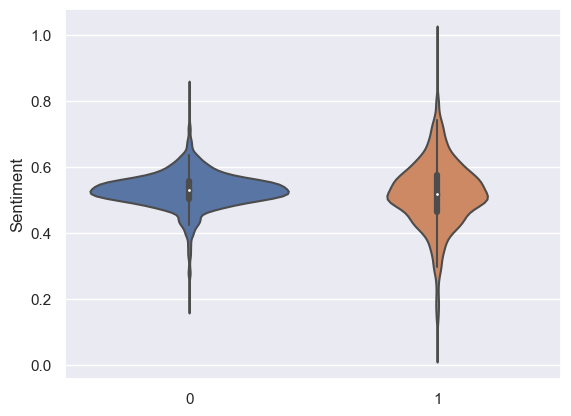

In [17]:
sns.set(style="darkgrid")
sns.violinplot(y=X["Sentiment"], x=list(Y["Fake"]))


<Axes: ylabel='score'>

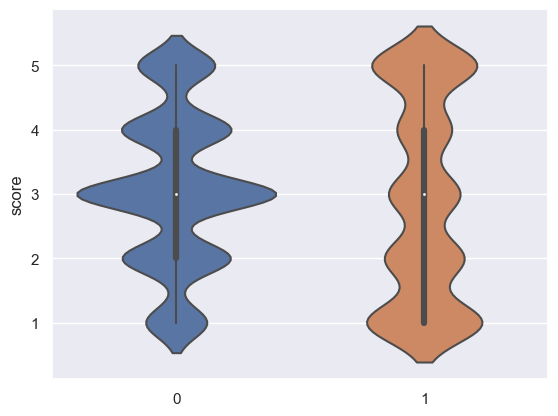

In [18]:
sns.violinplot(y=X["score"], x=list(Y["Fake"]))

<Axes: ylabel='number_count'>

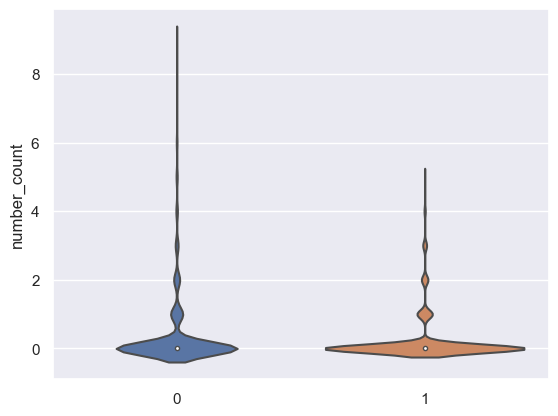

In [19]:
sns.violinplot(y=X["number_count"], x=list(Y["Fake"]))

<Axes: ylabel='english_count'>

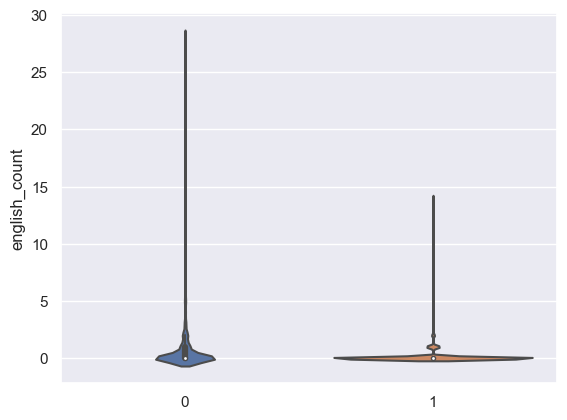

In [20]:
sns.violinplot(y=X["english_count"], x=list(Y["Fake"]))

<Axes: ylabel='chinese_count'>

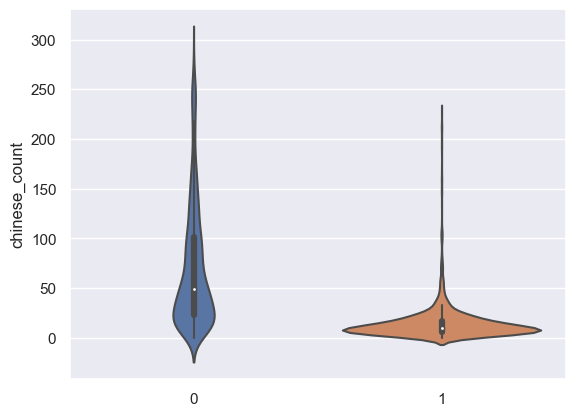

In [21]:
sns.violinplot(y=X["chinese_count"], x=list(Y["Fake"]))

<Axes: ylabel='ori_chinese_count'>

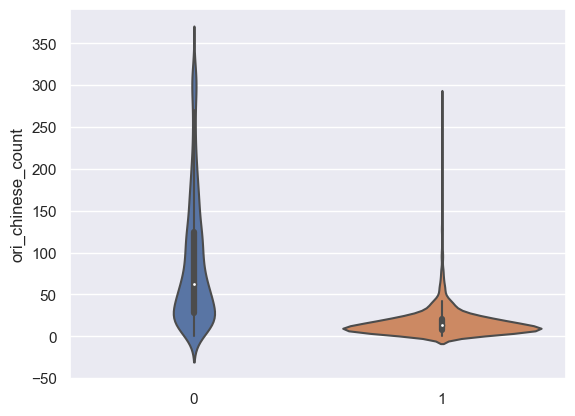

In [22]:
sns.violinplot(y=X["ori_chinese_count"], x=list(Y["Fake"]))

<Axes: ylabel='Emoji'>

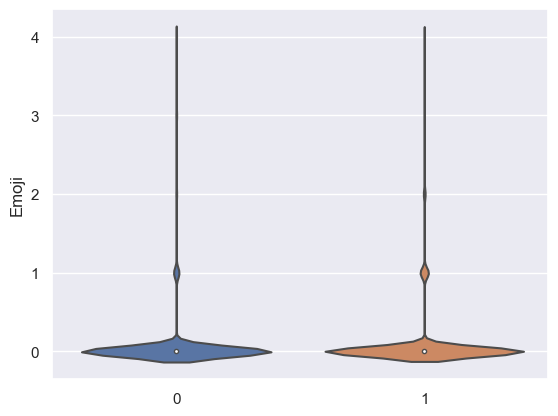

In [23]:
sns.violinplot(y=X["Emoji"], x=list(Y["Fake"]))

In [24]:
X = X.drop("Emoji", axis=1)
X = X.drop("ori_chinese_count", axis=1)

In [25]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 17)
# X_train

In [26]:
def my_train_test_split(data_x, data_y, rows_per_group, alpha=0.8):
    # Split the DataFrame into groups of similar rows
    groups_x = np.array_split(data_x, len(data_x) / rows_per_group)
    groups_y = np.array_split(data_y, len(data_y) / rows_per_group)

    # Combine the groups and their corresponding labels into tuples
    combined = list(zip(groups_x, groups_y))

    # Shuffle the combined data
    np.random.seed(17)
    np.random.shuffle(combined)

    # Determine the size of the train and test sets
    train_size = int(alpha * len(combined))
    test_size = len(combined) - train_size

    # Separate the shuffled data back into groups
    train_groups = combined[:train_size]
    test_groups = combined[train_size:]

    # Split the groups back into separate X and Y dataframes
    x_train = pd.concat([group[0] for group in train_groups])
    y_train = pd.concat([group[1] for group in train_groups])
    x_test = pd.concat([group[0] for group in test_groups])
    y_test = pd.concat([group[1] for group in test_groups])

    return x_train, x_test, y_train, y_test

# Split the data into train and test sets
X_train, X_test, y_train, y_test = my_train_test_split(X, Y, rows_per_group=4, alpha=0.8)

# Print the results
print("Training set X:\n", X_train)
print("Training set Y:\n", y_train)
print("Testing set X:\n", X_test)
print("Testing set Y:\n", y_test)

Training set X:
                                                    text  score  \
456   [網上, 吐槽, 那麼, 差, 同期, 同行, 業, 強, 反轉, 沒, 想到, 一看, 主...      4   
457   [吐槽, 那麼, 差, 同期, 同類, 強, 反轉, 沒, 想到, 一看, 主要, 趙, 太...      4   
458   [主要, 網上, 吐槽, 那麼, 差, 同期, 同類, 強, 反轉, 沒, 想到, 一看, ...      4   
459   [網上, 吐槽, 那麼, 差, 同期, 同類, 強, 反轉, 沒, 想到, 一看, 主要, ...      4   
2668               [期待, 彭昱暢, 劇, 拋, 臉, 完全, 不敢, 偶像, 劇, 認]      5   
...                                                 ...    ...   
1751  [這, 太, 理想化, 瞭, 拍, 太, 隨意, 瞭, 不敢相信, 居然, 6.8, 5.5...      2   
6368  [挺, 熱鬧, 挺不錯, 越, 吵, 搞笑, 部分, 停屍間, 笑, 哭, 瞭, 後, 半段...      3   
6369  [挺, 熱鬧, 搞笑, 部分, 挺不錯, 停屍間, 笑, 哭, 瞭, 後, 半段, 推理, ...      3   
6370  [挺, 熱鬧, 吵, 搞笑, 部分, 挺不錯, 停屍間, 笑, 哭, 瞭, 後, 半段, 推...      3   
6371  [挺, 熱鬧, 吵, 搞笑, 部分, 挺不錯, 停屍間, 笑, 哭, 瞭, 後, 半段, 推...      3   

      mention_of_movie_name  chinese_count  english_count  number_count  \
456                       0             42              0             0   
457                       0             

In [27]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [28]:
def dummy_fun(doc):
    return doc

tfidf = TfidfVectorizer(tokenizer=dummy_fun, preprocessor=dummy_fun, token_pattern=None, use_idf=True) 


In [29]:
temp_text = list(X_train["text"])
temp_X = tfidf.fit_transform(temp_text)
mydf = pd.DataFrame(temp_X.toarray(), columns=tfidf.get_feature_names_out())

X_train_tfidf = pd.concat([X_train, mydf], axis=1)
X_train_tfidf = X_train_tfidf.drop("text", axis=1)
print(X_train_tfidf)
X_train_tfidf.to_csv("X_train_tfidf_old_aug.csv", index=False)


      score  mention_of_movie_name  chinese_count  english_count  \
0         4                      0             42              0   
1         4                      0             37              0   
2         4                      0             41              0   
3         4                      0             41              0   
4         5                      0             16              0   
...     ...                    ...            ...            ...   
5115      2                      0             17              0   
5116      3                      0             54              2   
5117      3                      0             51              1   
5118      3                      0             57              2   
5119      3                      0             54              2   

      number_count  Sentiment   \t  \r\n   ..  ...  ...    齁    齊   齊名   齊齊  \
0                0   0.531986  0.0   0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1                0   0.52

In [30]:
temp_text = list(X_test["text"])
temp_X = tfidf.transform(temp_text)
mydf = pd.DataFrame(temp_X.toarray(), columns=tfidf.get_feature_names_out())

X_test_tfidf = pd.concat([X_test, mydf], axis=1)
X_test_tfidf = X_test_tfidf.drop("text", axis=1)
print(X_test_tfidf)
X_test_tfidf.to_csv("X_test_tfidf_old_aug.csv", index=False)


      score  mention_of_movie_name  chinese_count  english_count  \
0         1                      0              4              0   
1         1                      0              4              0   
2         1                      0              1              0   
3         1                      0              4              0   
4         3                      0              8              0   
...     ...                    ...            ...            ...   
1275      3                      0             75              6   
1276      1                      0              6              0   
1277      1                      0              6              0   
1278      1                      0              8              0   
1279      1                      0              6              0   

      number_count  Sentiment   \t  \r\n   ..  ...  ...    齁    齊   齊名   齊齊  \
0                0   0.725210  0.0   0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1                0   0.72

In [31]:
y_train.to_csv("y_train_old_aug.csv", index=False)
y_test.to_csv("y_test_old_aug.csv", index=False)